<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller: Identificando  Burger Master con MMG

El Burger Master es un evento creado en el 2016 por el *influencer* Tulio Zuluaga, más conocido en redes como Tulio recomienda, el cual busca que por una semana las hamburgueserías de cada ciudad ofrezcan su mejor producto a un precio reducido.

El evento ha venido creciendo y en el 2022 se extendió por 21 ciudades de Colombia para las cuales se estimó que se vendieron más de dos millones de hamburguesas. El objetivo del presente caso-taller  es identificar los puntos calientes de hamburgueserías  que compitieron en  la ciudad de Bogotá aplicando el Modelo de Mezclas Gaussianas.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero."

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.


## Desarrollo

### 1. Carga de datos  

En la carpeta `data` se encuentra el archivo `burger_master.xlsx` para la ciudad de Bogotá, cargue estos datos en su *cuaderno* y reporte brevemente el contenido de la base.

,Restaurante,Dirección,Descripción,Latitud,Longitud
0,MAIKKI,Cra 75 # 24D – 48,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.668833,-74.116828
1,MAIKKI,Calle 119 # 11A – 24,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.698395,-74.036585
2,MAIKKI,Cra 47A # 98 – 47,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.686401,-74.060144
3,FRENCHEESE,Calle 51 #22-55,"<p>Presentamos «La French Master», inspirada e...",4.639514,-74.073545
4,FRENCHEESE,Calle 80 #14-41,"<p>Presentamos «La French Master», inspirada e...",4.666147,-74.056758


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Restaurante  137 non-null    object 
 1   Dirección    137 non-null    object 
 2   Descripción  137 non-null    object 
 3   Latitud      137 non-null    float64
 4   Longitud     137 non-null    float64
dtypes: float64(2), object(3)
memory usage: 5.5+ KB


<Axes: xlabel='Longitud', ylabel='Latitud'>

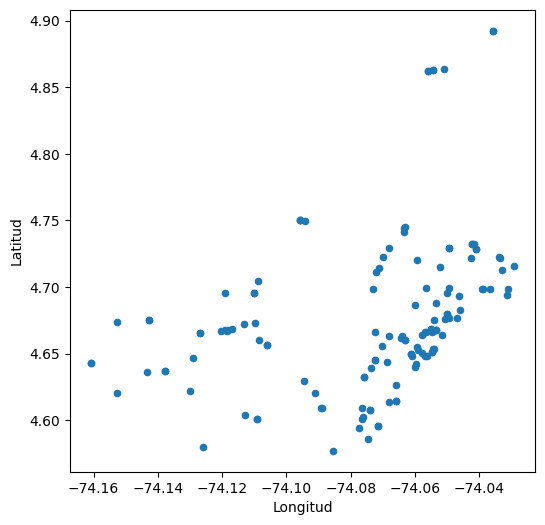

In [1]:
# Utilice este espacio para escribir el código.

import pandas as pd
import numpy as np

dta = pd.read_excel('/content/burger_master.xlsx')
display(dta.head())

dta.info()

# Se muestran los datos de lat y lon usando matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (6, 6), dpi = 100)
dta.plot(kind = 'scatter', x = 'Longitud', y = 'Latitud', ax = ax)

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

**Respuesta 1 **- La base de datos contiene información sobre 137 restaurantes que participaron en el Burger Master en Bogotá. Incluye el nombre del restaurante, su dirección, una descripción de la hamburguesa ofrecida, y las coordenadas geográficas de latitud y longitud para cada ubicación. Todas las columnas tienen valores con información, no nulos. Las columnas Restaurante, Dirección, y Descripción son de tipo objeto de cadenas de texto, latitud y longitud son de tipo flotante, adecuadas para representar coordenadas geográficas.

### 2.  Visualizando los datos

Visualice la ubicación de cada restaurante en un mapa interactivo. Añada un marcador para cada restaurante y la posibilidad de encontrar la descripción de la hamburguesa ofrecida en un pop-up. (Note que la columna Descripción contiene otra información adicional).

In [2]:
# Revisando el contenido del campo Descripción contiene además del nombre de la hamburguesa su descripción,
# en alguno casos información de las direcciones de los locales de ese restaurante. Por lo que se define una
# función para limpier el contenido.

def extract_description(description):
    # Remueva <p> y </p> tags del texto
    description = description.replace('<p>', '').replace('</p>', '')
    # Rompe la cadena cuando encuentra el primer <br/> que es donde aparece la información de direcciones
    return description.split('<br/>')[0]

# Aplicamos la función al campo 'Descripción' y agregamos una nueva columna
dta['Burger_Description'] = dta['Descripción'].apply(extract_description)

# Mostramos el contenido de la Burger_Description
display(dta[['Descripción', 'Burger_Description']].head())

,Descripción,Burger_Description
0,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...","MAIKKI MACUIRA: Cama de chicharrón soplado, to..."
1,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...","MAIKKI MACUIRA: Cama de chicharrón soplado, to..."
2,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...","MAIKKI MACUIRA: Cama de chicharrón soplado, to..."
3,"<p>Presentamos «La French Master», inspirada e...","Presentamos «La French Master», inspirada en n..."
4,"<p>Presentamos «La French Master», inspirada e...","Presentamos «La French Master», inspirada en n..."


In [3]:
import folium

# Creamos el mapa centrado en Bogotá
map_bogota = folium.Map(location=[4.6591, -74.0847], zoom_start=11)

# Agregamos un marcador a cada restaurante con el nombre del restaurante y cuando se da click en cada uno
# despliega la descripción con el nombre la hamburguesa que esta participando en el concurso.

for index, row in dta.iterrows():
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=f"<b>{row['Restaurante']}</b><br>{row['Burger_Description']}",
        tooltip=row['Restaurante']
    ).add_to(map_bogota)

# Mostramos el mapa
display(map_bogota)

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

**Respuesta 2** - Se extrae de la Descripción original la información relevante y se crea el mapa en folium centrado en las coordenadas del centro de Bogotá. Es un mapa interactivo que permite ver la ubicación por restaurante con la descripción solicitada.

### 3.  Análisis de puntos calientes

Aplique el modelo de Mezclas Gaussianas para buscar clusters de restaurantes en Bogotá, mencione qué estructura de covarianza usó y explique por qué. Escoja el número óptimo de componentes, explicando el procedimiento y justificando su elección.

In [14]:
# Utilice este espacio para escribir el código.

# Se replica el codigo utilizado en el taller de la semana 8

from sklearn.mixture import GaussianMixture

#Estimamos MMG y obtenemos a que componente pertenece, se incia el ejercicio starting from 4 clusters
X = dta[['Longitud','Latitud']].values
# Fitting GMM with 4 components as suggested by BIC score
MMG_teatros = GaussianMixture(n_components=6, covariance_type='full',random_state=123)
labels = MMG_teatros.fit(X).predict(X)

dta['cluster']=labels

#Mapa base
map = folium.Map(location = [dta.Latitud.mean(), dta.Longitud.mean()], tiles = "OpenStreetMap", zoom_start = 10)
# Otras opciones de tiles
#Stamen Terrain, Toner, and Watercolor

# Define colors for clusters (6 colors requested by user, but only 4 will be used for this GMM fit)
colour = ['red',
    'orange',
    'green',
    'purple',
    'cadetblue',
    'pink']

def colorCall(val):
  val = int(val)
  return colour[val]

#capa clusters de restaurantes
for lat, lon, c in zip(dta['Latitud'], dta['Longitud'], dta['cluster']):
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        fill_color = colorCall(c),
        fill=True,
        color=colorCall(c),
        fill_opacity=0.7
        ).add_to(map)



#Display el mapa
map

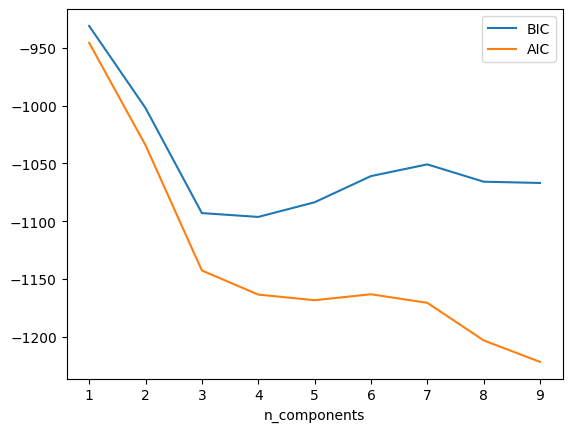

In [5]:
# Se replica el codigo utilizado en el taller de la semana 8

from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 10)
# Select only the numerical columns 'Longitud' and 'Latitud' for fitting
X = dta[['Longitud', 'Latitud']].values
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

**Respuesta 3** - Para el ejercicio se aplicó un Modelo de Mezclas Gaussianas (MMG) con las coordenadas de longitud y latitud de los restaurantes del Burger Master en Bogotá, utilizando la estructura de covarianza con la opción covariance_type='full', que permite que cada componente del modelo tenga su propia matriz de covarianza completa. Se justifica esta elección porque en contexto de geolocalización en zonas urbanas principalmente, las infraestruturas de servicios y comercio, y particularmente los restaurantes no se agrupan en clusters circulares o alineados a algun eje. Pueden aglomerarse o agruparse en áreas alargadas u orientaciones no uniformes, asociadas a corredores viales o zonas o barrios particulares. El tipo full es el más flexible y captura mejor esas formas, mientras que spherical o diag son más restrictivos.

Para seleccionar el número de componentes se ajustaron modelos con diferentes valores de clusters y se calcularon los criterios de información AIC y BIC. En la gráfica se observa que el BIC alcanza su mínimo alrededor de 4 componentes, indicando que ese es el mejor balance entre ajuste y complejidad del modelo. El AIC muestra que puede bajar aun más pero aumentando la complejidad generando un sobreajuste innocesario. Por lo tanto con un GMM de 4 componentes y covarianza completa, se logra una representación adecuada de los puntos calientes de hamburgueserías en Bogotá que participaron en el Burguer Master.

#### 3.1. Visualización de los resultados

Visualice las densidades estimadas por el  mejor modelo estimado en la sección anterior usando un mapa de calor interactivo, discuta los resultados.

In [16]:
# Utilice este espacio para escribir el código.

# 1) Densidad normalizada
dens = np.exp(log_densities)
dens_norm = (dens - dens.min()) / (dens.max() - dens.min() + 1e-12)

# 2) Filtra por cuantil (foco real de calor)
q = np.quantile(dens_norm, 0.90)  # prueba 0.90 o 0.95
mask = dens_norm >= q

lat_f = Lat_mesh.ravel()[mask]
lon_f = Lon_mesh.ravel()[mask]
w_f   = dens_norm[mask]

# 3) Prepara datos [lat, lon, weight]
heatmap_data = np.column_stack([lat_f, lon_f, w_f]).tolist()

# 4) Dibuja heatmap con kernel más estrecho y max_val explícito
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt # Ensure matplotlib is imported
from sklearn.mixture import GaussianMixture # Import GaussianMixture
import numpy as np # Ensure numpy is imported

m = folium.Map(location=[dta.Latitud.mean(), dta.Longitud.mean()], zoom_start=11)
HeatMap(heatmap_data, radius=10, blur=12, max_val=1.0, min_opacity=0.2).add_to(m)

# Fit GMM with 4 components and add cluster markers
X = dta[['Longitud','Latitud']].values
MMG_teatros = GaussianMixture(n_components=4, covariance_type='full',random_state=123)
labels = MMG_teatros.fit(X).predict(X)

# Add cluster labels to the DataFrame (optional, but good for consistency)
dta['cluster'] = labels

# Define colors for clusters
colour = ['red',
    'orange',
    'green',
    'purple']

# Add markers for each restaurant with cluster coloring
for index, row in dta.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=8,
        fill_color = colour[row['cluster']],
        fill=True,
        color=colour[row['cluster']],
        fill_opacity=0.7,
        popup=f"<b>{row['Restaurante']}</b><br>Cluster: {row['cluster']}",
        tooltip=row['Restaurante']
    ).add_to(m)


m

/tmp/ipython-input-1392080061.py:24: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heatmap_data, radius=10, blur=12, max_val=1.0, min_opacity=0.2).add_to(m)


(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

### 4. Comparación con KDE

Estime ahora las densidades usando KDE bivariado de la librería `statsmodels` con el anchos de banda dado por `cv_ml`. Muestre los resultados usando un mapa interactivo. Compare los resultados obtenidos por el "mejor" modelo encontrado via MMG.

/usr/local/lib/python3.12/dist-packages/statsmodels/nonparametric/kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


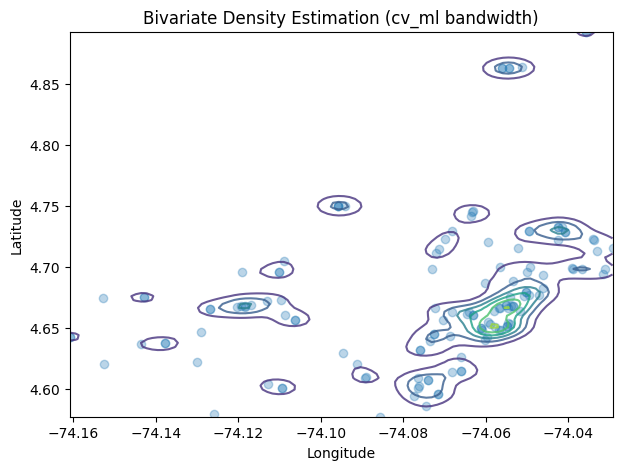

In [7]:
# Utilice este espacio para escribir el código.

#Cargamos la librería
import statsmodels.api as sm
import numpy as np # Added import
import matplotlib.pyplot as plt # Added import

# Fit KDEMultivariate only to the 'Latitud' and 'Longitud' columns
dens_u = sm.nonparametric.KDEMultivariate(data=dta[['Longitud', 'Latitud']].values, var_type='cc', bw='cv_ml')

dens_u.bw

# Grilla de valores dentro del rango observado (2 dimensiones)
# Use 'lon' and 'lat' column names
x = np.linspace(min(dta.Longitud), max(dta.Longitud), 100)
y = np.linspace(min(dta.Latitud), max(dta.Latitud), 100)
xx, yy = np.meshgrid(x, y)
grid_points = np.column_stack([xx.ravel(), yy.ravel()])

densidad_pred = dens_u.pdf(data_predict=grid_points)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

# Use 'Longitud' and 'Latitud' column names for scatter plot
ax.scatter(dta.Longitud, dta.Latitud, alpha=0.3)
ax.contour(
    xx, yy, densidad_pred.reshape(xx.shape),
    alpha =0.8
)

plt.xlabel('Longitude') # Added label
plt.ylabel('Latitude') # Added label
plt.title('Bivariate Density Estimation (cv_ml bandwidth)') # Added title
plt.show() # Added show

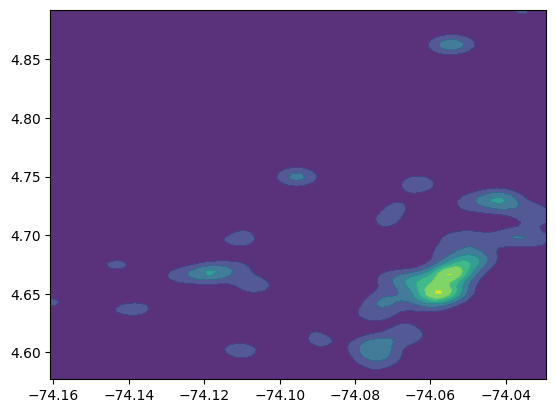

In [8]:
!pip install geojsoncontour

import geojsoncontour


contourf_normal_reference = plt.contourf(xx, yy, densidad_pred.reshape(xx.shape),
    alpha =0.9, linestyles='None')

geojson_normal_reference = geojsoncontour.contourf_to_geojson(
    contourf=contourf_normal_reference,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.5)

In [12]:
import folium
import geojsoncontour
import matplotlib.pyplot as plt # Import matplotlib to generate contourf
from sklearn.mixture import GaussianMixture
import numpy as np

# Assuming dta DataFrame is loaded and contains 'Latitud', 'Longitud', 'Restaurante', and 'cluster'
# Assuming xx, yy, and densidad_pred are available from the previous KDE calculation
# If not, you would need to re-run the KDE calculation and grid creation and GMM clustering

# Create a base map centered around Bogotá
map_kde_contours = folium.Map(location=[dta.Latitud.mean(), dta.Longitud.mean()], tiles="OpenStreetMap", zoom_start=11)

# Define colors for clusters (should match the number of clusters, which is 4)
colour = ['red',
    'orange',
    'green',
    'purple']

# Add markers for each restaurant with cluster coloring
for index, row in dta.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=8,
        fill_color = colour[row['cluster']],
        fill=True,
        color=colour[row['cluster']],
        fill_opacity=0.7,
        popup=f"<b>{row['Restaurante']}</b><br>Cluster: {row['cluster']}",
        tooltip=row['Restaurante']
    ).add_to(map_kde_contours)

# Generate contourf plot (necessary to create the geojson)
# Use a temporary figure and axes that won't be displayed
fig, ax = plt.subplots()
contourf_normal_reference = ax.contourf(xx, yy, densidad_pred.reshape(xx.shape),
    alpha =0.9, linestyles='None')
plt.close(fig) # Close the figure to prevent it from being displayed

# Convert contourf to geojson
geojson_normal_reference = geojsoncontour.contourf_to_geojson(
    contourf=contourf_normal_reference,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.5)

# Add the geojson contour layer to the map
folium.GeoJson(
    geojson_normal_reference,
    name='KDE Contours'
).add_to(map_kde_contours)

# Add layer control to toggle layers
folium.LayerControl().add_to(map_kde_contours)


# Display the map
display(map_kde_contours)

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

**Respuesta 4** -

